In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [6]:
label_map = {
    0: 'Actinic keratoses',
    1: 'Basal cell carcinoma',
    2: 'Benign keratosis-like lesions',
    3: 'Dermatofibroma',
    4: 'Melanocytic nevi',
    5: 'Melanoma',
    6: 'Vascular lesions'
}

In [7]:
def load_and_preprocess_image(image_path, target_size):
    """Load and preprocess an image for prediction."""
    img = load_img(image_path, target_size=target_size)  # Resize ảnh
    img_array = img_to_array(img)  # Chuyển sang array
    img_array = np.expand_dims(img_array, axis=0)  # Thêm batch dimension
    img_array = img_array / 255.0  # Chuẩn hóa
    return img_array

In [15]:
def predict_images(model_path, test_folder, target_size=(224, 224)):
    """Dự đoán và hiển thị mỗi nhãn với một ảnh duy nhất."""
    # Load mô hình
    model = load_model(model_path)
    # Lấy danh sách các file ảnh
    image_files = [os.path.join(test_folder, f) for f in os.listdir(test_folder) if f.lower().endswith(('png', 'jpg', 'jpeg'))]
    
    # Tập hợp để theo dõi nhãn đã hiển thị
    displayed_labels = set()
    
    for image_path in image_files:
        # Tiền xử lý ảnh
        img_array = load_and_preprocess_image(image_path, target_size)
        # Dự đoán xác suất
        probabilities = model.predict(img_array)[0]
        # Nhãn dự đoán
        predicted_label = np.argmax(probabilities)
        confidence = probabilities[predicted_label]
        
        # Nếu nhãn chưa được hiển thị, in ra và hiển thị
        if predicted_label not in displayed_labels:
            label_name = label_map[predicted_label]
            displayed_labels.add(predicted_label)
            
            # Chuẩn bị thông tin
            predicted_label_dict = {predicted_label: label_name}
            
             # Dự đoán xác suất của từng nhãn
            prob_dict = {label_map[i]: prob for i, prob in enumerate(probabilities)}
            
            # In thông tin
            print(f"Image: {os.path.basename(image_path)}")
            print(f"Preicted probabilities of each label: {prob_dict}\n")
            print(f"Predicted Label: {predicted_label_dict}")
            
            # Hiển thị ảnh
            img = load_img(image_path)
            plt.imshow(img)
            plt.axis('off')
            plt.title(f"{label_name}\nConfidence: {confidence:.2f}")
            plt.show()
        
        # Nếu đã hiển thị đủ số lượng nhãn, dừng lại
        if len(displayed_labels) == len(label_map):
            break

1/1 [==============================] - 0s 275ms/step
Image: ISIC_0024307.jpg
Preicted probabilities of each label: {'Actinic keratoses': 0.000119628145, 'Basal cell carcinoma': 0.00024384855, 'Benign keratosis-like lesions': 0.005425087, 'Dermatofibroma': 0.000118145836, 'Melanocytic nevi': 0.99322975, 'Melanoma': 0.000853047, 'Vascular lesions': 1.0432904e-05}

Predicted Label: {4: 'Melanocytic nevi'}


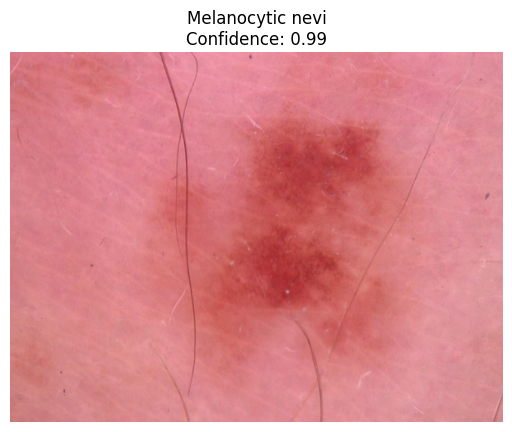

1/1 [==============================] - 0s 20ms/step
Image: ISIC_0024328.jpg
Preicted probabilities of each label: {'Actinic keratoses': 0.00058941543, 'Basal cell carcinoma': 0.00052995863, 'Benign keratosis-like lesions': 0.044971954, 'Dermatofibroma': 1.5031576e-05, 'Melanocytic nevi': 0.44644555, 'Melanoma': 0.50740725, 'Vascular lesions': 4.0816714e-05}

Predicted Label: {5: 'Melanoma'}


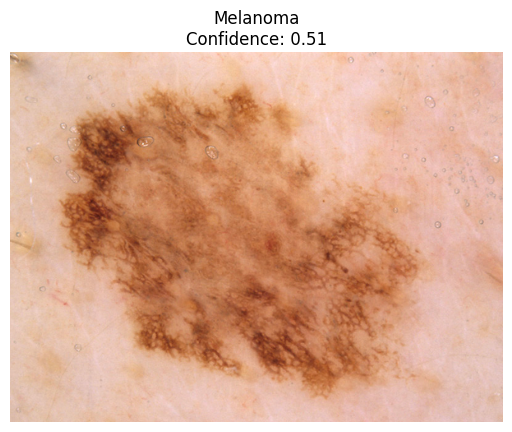

1/1 [==============================] - 0s 20ms/step
Image: ISIC_0024330.jpg
Preicted probabilities of each label: {'Actinic keratoses': 0.113225944, 'Basal cell carcinoma': 0.19626155, 'Benign keratosis-like lesions': 0.1535782, 'Dermatofibroma': 0.11466046, 'Melanocytic nevi': 0.18144986, 'Melanoma': 0.12649597, 'Vascular lesions': 0.11432795}

Predicted Label: {1: 'Basal cell carcinoma'}


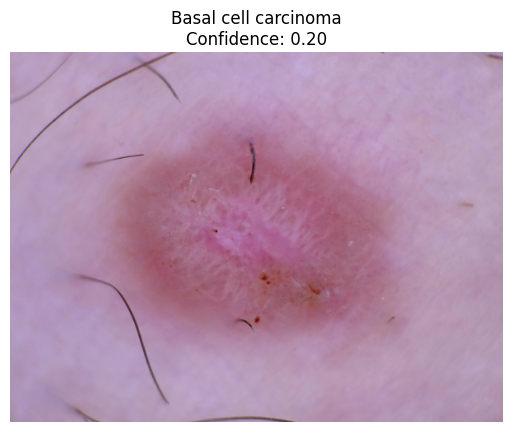

1/1 [==============================] - 0s 24ms/step
Image: ISIC_0024333.jpg
Preicted probabilities of each label: {'Actinic keratoses': 0.17656061, 'Basal cell carcinoma': 0.16697761, 'Benign keratosis-like lesions': 0.33849955, 'Dermatofibroma': 0.012648755, 'Melanocytic nevi': 0.14093147, 'Melanoma': 0.15760042, 'Vascular lesions': 0.006781638}

Predicted Label: {2: 'Benign keratosis-like lesions'}


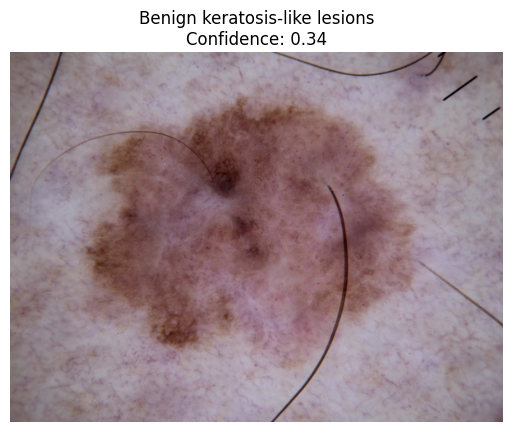

1/1 [==============================] - 0s 18ms/step
Image: ISIC_0024370.jpg
Preicted probabilities of each label: {'Actinic keratoses': 1.6993296e-17, 'Basal cell carcinoma': 3.8654058e-09, 'Benign keratosis-like lesions': 1.7468425e-14, 'Dermatofibroma': 3.512126e-07, 'Melanocytic nevi': 6.5633024e-08, 'Melanoma': 2.137902e-10, 'Vascular lesions': 0.9999995}

Predicted Label: {6: 'Vascular lesions'}


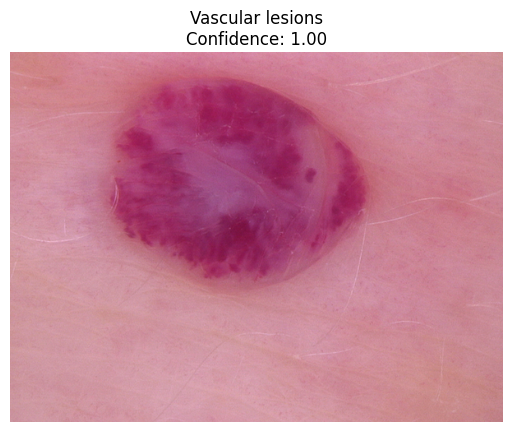

1/1 [==============================] - 0s 20ms/step
Image: ISIC_0024382.jpg
Preicted probabilities of each label: {'Actinic keratoses': 0.28471333, 'Basal cell carcinoma': 0.11907247, 'Benign keratosis-like lesions': 0.26853395, 'Dermatofibroma': 0.018460723, 'Melanocytic nevi': 0.16657393, 'Melanoma': 0.13543342, 'Vascular lesions': 0.00721217}

Predicted Label: {0: 'Actinic keratoses'}


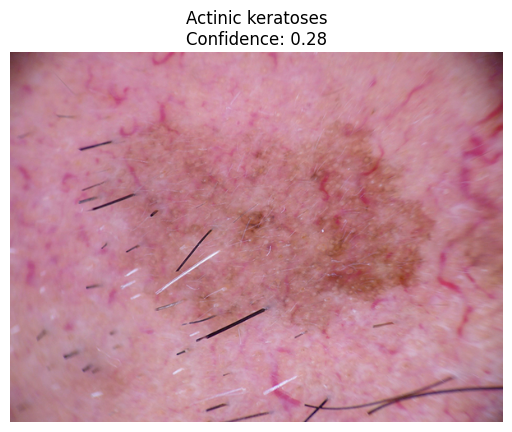

1/1 [==============================] - 0s 17ms/step
Image: ISIC_0029177.jpg
Preicted probabilities of each label: {'Actinic keratoses': 1.2610958e-10, 'Basal cell carcinoma': 4.3671054e-07, 'Benign keratosis-like lesions': 1.6628822e-10, 'Dermatofibroma': 0.99999344, 'Melanocytic nevi': 5.6932895e-06, 'Melanoma': 3.1701362e-09, 'Vascular lesions': 3.585024e-07}

Predicted Label: {3: 'Dermatofibroma'}


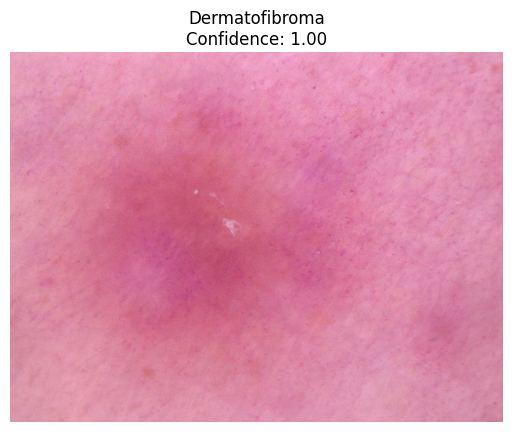

In [16]:
# Đường dẫn tới mô hình và thư mục chứa ảnh test
model_path = r"E:\resnet_model.h5"
test_folder = "E:\HAM_images_labels"
predict_images(model_path, test_folder)
